In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
#Wtrue = np.array([1,-0.5,-1,0.5])
Wtrue = np.array([0.8,0,-0.8,0])

In [24]:
[0.8,0,-0.8,0]

[ 0.8  0.  -0.8  0. ]


In [4]:
sigma = 0.584
gamma = 1

In [5]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

### Generate dataset

In [6]:
x = np.random.uniform(-1,1,10)
v = np.random.normal(0,sigma,10)

In [7]:
new_data = pd.DataFrame({'x':x})
new_data['x2'] = np.multiply(new_data['x'],new_data['x'])
new_data['x3'] = np.multiply(new_data['x2'],new_data['x'])
new_data['ones'] = np.ones((10,))

In [8]:
new_data = new_data[['x3','x2','x','ones']]

In [9]:
new_data['y'] = Wtrue[0]*new_data['x3'] + Wtrue[1]*new_data['x2'] + Wtrue[2]*new_data['x'] + Wtrue[0]*new_data['ones'] + v

In [26]:
new_data[['x','y']].head(11)

,x,y
0,-0.564228,1.246816
1,0.370274,0.815324
2,-0.139249,1.570922
3,-0.215180,0.561087
4,-0.314784,1.597067
5,-0.510410,1.725733
6,-0.755301,0.312010
7,-0.550297,0.717947
8,0.637334,1.130722
9,-0.740858,1.396303


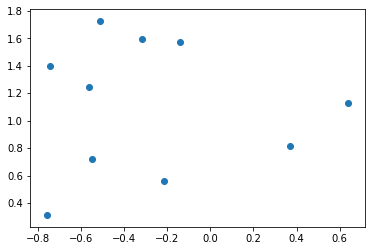

In [28]:
plt.scatter(new_data['x'],new_data['y'])

In [11]:
X = new_data.iloc[:,0:4]
np.shape(X)

(10, 4)

In [12]:
var_ratio = (sigma/gamma)**2

In [13]:
w_new = np.dot(np.linalg.inv(np.dot(X.T,X)+(var_ratio*np.eye(4))),np.dot(X.T,new_data['y']))

In [14]:
np.sqrt(np.sum(np.square(w_new-Wtrue)))

1.972437011736174

In [15]:
np.dot(w_new.T,Wtrue)

0.16828754403176382

In [16]:
w_new

array([-0.62073805,  1.11347775, -0.83109748,  0.79448814])

## part 2

In [17]:
K = 100

In [18]:
gamma_range = 10**(np.linspace(-10,10,20))

In [19]:
print(len(gamma_range))

20


In [20]:
W_final_loss = np.zeros((len(gamma_range),4))
for j in range(len(gamma_range)-1):
    W_norm = []
    for i in range(K):
        x = np.random.uniform(-1,1,10)
        v = np.random.normal(0,sigma,10)
        new_data = pd.DataFrame({'x':x})
        new_data['x2'] = np.multiply(new_data['x'],new_data['x'])
        new_data['x3'] = np.multiply(new_data['x2'],new_data['x'])
        new_data['ones'] = np.ones((10,))
        new_data = new_data[['x3','x2','x','ones']]
        new_data['y'] = Wtrue[0]*new_data['x3'] + Wtrue[1]*new_data['x2'] + Wtrue[2]*new_data['x'] + Wtrue[0]*new_data['ones'] + v


        X = new_data.iloc[:,0:4]



        var_ratio = (sigma/gamma_range[j])**2


        w_new = np.dot(np.linalg.inv(np.dot(X.T,X)+(var_ratio*np.eye(4))),np.dot(X.T,new_data['y']))

        W_norm.append(np.sqrt(np.sum(np.square(w_new-Wtrue))))
    
    W_final_loss[j,0] = min(W_norm)
    W_final_loss[j,1] = np.percentile(W_norm,25)
    W_final_loss[j,2] = np.percentile(W_norm,75)
    W_final_loss[j,3] = max(W_norm)

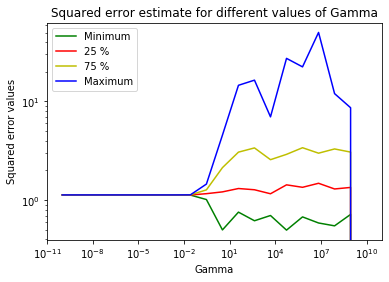

In [29]:
plt.plot(gamma_range,W_final_loss[:,0],color='g')
plt.plot(gamma_range,W_final_loss[:,1],color='r')
plt.plot(gamma_range,W_final_loss[:,2],color='y')
plt.plot(gamma_range,W_final_loss[:,3],color='b')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Gamma')
plt.ylabel('Squared error values')
plt.title('Squared error estimate for different values of Gamma')
plt.legend(('Minimum', '25 %', '75 %', 'Maximum'))
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()